## Introduction

Most data sets in real life require extensive cleaning and manipulation to extract any meaningful insights. In fact, Forbes estimates that data scientists spend about 60% of their time cleaning and organizing data, so it's critical to be able to manipulate data quickly and efficiently.

We'll work with the World Happiness Report, an annual report created by the UN Sustainable Development Solutions Network with the intent of guiding policy. The report assigns each country a happiness score based on the answers to a poll question that asks respondents to rank their life on a scale of 0 - 10.

It also includes estimates of factors that may contribute to each country's happiness, including economic production, social support, life expectancy, freedom, absence of corruption, and generosity, to provide context for the score. Although these factors aren't actually used in the calculation of the happiness score, they can help illustrate why a country received a certain score.

__Goal:__ We'll work to answer the following questions:
- How can aggregating the data give us more insight into happiness scores?
- How did world happiness change from 2015 to 2017?
- Which factors contribute the most to the happiness score?

__Data:__ The World Happiness Report for 2015 can be found <a href="https://www.kaggle.com/unsdsn/world-happiness">here</a>.

The descriptions for some of the columns we'll be working with:
- `Country` - Name of the country.
- `Region` - Name of the region the country belongs to.
- `Happiness Rank` - The rank of the country, as determined by its happiness score.
- `Happiness Score` - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.
- `Family` - The estimated extent to which family contributes to the happiness score.
- `Freedom` - The estimated extent to which freedom contributes to the happiness score.
- `Generosity` - The estimated extent to which generosity contributes to the happiness score.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')
first_5 = happiness2015.head()
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 13.6+ KB


### Using Loops to Aggregate Data

Each country in the `happiness2015` dataframe is assigned to a region, specified in the `Region` column. We can use the `Series.unique()` method to confirm the unique regions:
```
happiness2015['Region'].unique()
```
Let's try plotting just one region next:
```
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))
```
<img src='_images/asia_happiness.png' />
It's much easier to read this visualization - we can clearly see the labels and values.

We learned a way to use loops for aggregation. Our process looked like this:
- Identify each unique group in the data set.
- For each group:
    - Select only the rows corresponding to that group.
    - Calculate the average for those rows.
Let's use the same process to find the mean happiness score for each region.

In [3]:
mean_happiness={}
regions = happiness2015['Region'].unique()
for row in regions:
    region_group = happiness2015[happiness2015['Region'] == row]
    region_mean = region_group['Happiness Score'].mean()
    mean_happiness[row] = region_mean

In [4]:
mean_happiness

{'Australia and New Zealand': 7.285,
 'Central and Eastern Europe': 5.332931034482757,
 'Eastern Asia': 5.626166666666666,
 'Latin America and Caribbean': 6.1446818181818195,
 'Middle East and Northern Africa': 5.406899999999999,
 'North America': 7.273,
 'Southeastern Asia': 5.317444444444444,
 'Southern Asia': 4.580857142857143,
 'Sub-Saharan Africa': 4.2028,
 'Western Europe': 6.689619047619048}

### The GroupBy Operation

Let's break down the code we wrote in the previous screen into three steps:
1. Split the dataframe into groups.
2. Apply a function to each group.
3. Combine the results into one data structure.

```
mean_happiness = {}
regions = happiness2015['Region'].unique()

for row in regions:
    #1. Split the dataframe into groups.
    region_group = happiness2015[happiness2015['Region'] == row]
    #2. Apply a function to each group.
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[row] = region_mean
```
<img src='_images/split_apply_combine.svg' />

pandas has a built-in `groupby` operation performs the "split-apply-combine" process on a dataframe, but condenses it into two steps:
1. Create a GroupBy object.
2. Call a function on the GroupBy object.
The GroupBy object, distinct from a dataframe or series object, allows us to split the dataframe into groups, but only in an abstract sense. Nothing is actually computed until a function is called on the GroupBy object.

Creating the initial mapping document, or GroupBy object, allows us to optimize our work, because we no longer have to refer back to the original dataframe. By working with the `groupby` operation, we make our code faster, more flexible, and easier to read.

### Creating GroupBy Objects

The first step in the groupby operation is to create a GroupBy object:
<img src='_images/Groupby_Full.svg' />
To create a GroupBy object, we use the DataFrame.groupby() method:
```
df.groupby('col')
```
where `col` is the column you want to use to group the data set.

When choosing the column, think about which columns could be used to split the data set into groups. To put it another way, look at columns with the same value for multiple rows.
<img src='_images/Groups.svg' />

Before we start aggregating data, we'll build some intuition around GroupBy objects. We'll start by using the `GroupBy.get_group()` method to select data for a certain group.

In [5]:
grouped = happiness2015.groupby('Region')
aus_nz = grouped.get_group('Australia and New Zealand')

### Exploring GroupBy Objects

We can use the `GroupBy.groups` attribute to get more information about the GroupBy object:
```
grouped = happiness2015.groupby('Region')
grouped.groups
```
The result is a dictionary in which each key corresponds to a region name. The values include the index for each row in the original happiness2015 dataframe with the corresponding region name.

In [6]:
north_america = happiness2015.iloc[[4, 14]]
na_group = grouped.get_group('North America')
equal = north_america == na_group

### Common Aggregation Methods with Groupby

Pandas has built in a number of other common aggregation methods:

| __Methods__ | __Description__ |
|-|-|
| __mean()__ | Calculates the mean of groups. |
| __sum()__ | Calculates the sum of group values. |
| __size()__ | Calculates the size of the groups. |
| __count()__ | Calculates the count of values in groups. |
| __min()__ | Calculates the minimum of group values. |
| __max()__ | Calculates the maximum of group values. |

In [7]:
means = grouped.mean()

In [8]:
means

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


`Region` appears in a different row than the rest of the column names. Because we grouped the dataframe by region, the unique values in `Region` are used as the index. Up until now, we've mostly worked with dataframes with a numeric index.
<img src='_images/Index_Example.svg' />

### Aggregating Specific Columns with Groupby

In some cases, we may only wish to aggregate one particular column in the original dataframe. GroupBy objects actually support column indexing, just like dataframes. You can select specific columns for a GroupBy object the same way you would for a dataframe:

| __Select by Label__ | __Syntax__ |
|-|-|
| Single column | GroupBy["col1"] |
| List of columns | GroupBy[["col1", "col2"]] |

In [9]:
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()

### Introduction to the Agg() Method

The `GroupBy.agg()` method can perform both aggregations at once. We can use the following syntax:
```
GroupBy.agg([func_name1, func_name2, func_name3])
```
When we pass the functions into the `agg()` method as arguments, we don't use parentheses after the function names.

In [10]:
import numpy as np

In [12]:
def dif(group):
    return (group.max() - group.mean())

happy_mean_max = happy_grouped.agg([np.mean, np.max])
mean_max_dif = happy_grouped.agg(dif)

### Computing Multiple and Custom Aggregations with the Agg() Method

Up until this point, we've deliberately split creating the GroupBy object and calling a function into separate steps to make it easier to understand. However, if you read through other teaching resources, you may see instances in which the statements are combined:
```
happiness2015.groupby('Region')['Happiness Score'].agg(dif)
```
Both approaches will return the same result. However, if you plan on computing multiple aggregations with the same GroupBy object, it's recommended to save the object to a variable first.

In [13]:
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
happiness_means

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

- The index of happiness_means are the unique values of the `Region`
- The aggregated values of happiness_means correspond to the `Happiness Score` column
<img src='_images/PV_Syntax.svg' />

### Aggregation with Pivot Tables

`Index` and `values` are actually arguments used in another method used to aggregate data - the `DataFrame.pivot_table()` method.

This `df.pivot_table()` method can perform the same kinds of aggregations as the `df.groupby` method and make the code for complex aggregations easier to read.

Example, we use the `df.pivot_table()` method to perform the same aggregation as above.
```
happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)
```
__Note__: `mean` is the default aggregation function of `df.pivot_table()`

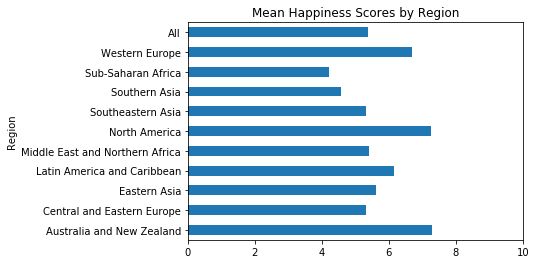

In [14]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)

# Plotting the DF
pv_happiness.plot(kind='barh', xlim=(0,10), title='Mean Happiness Scores by Region', legend=False)

In [15]:
world_mean_happiness = happiness2015['Happiness Score'].mean()
world_mean_happiness

5.37573417721519

`world_mean_happiness` is equal to the `'All'` group in the aboce visualization.

When we set the `margins` parameter equal to `True`, `All` will be added to the index of the resulting dataframe and the corresponding value will be the result of applying the aggregation method to the entire column. In our example, `All` is the mean of the `Happiness Score` column.

### Aggregating Multiple Columns and Functions with Pivot Tables

The `pivot_table` method also allows us to aggregate multiple columns and apply multiple functions at once.

Below, we aggregate both the 'Happiness Score' and 'Family' columns in `happiness2015` and group by the 'Region' column:
```
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')
```

To apply multiple functions, we can pass a list of the functions into the aggfunc parameter:
```
happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)
```

In [16]:
grouped = happiness2015.groupby('Region')['Happiness Score', 'Family']
happy_family_stats = grouped.agg([np.min, np.max, np.mean])

pv_happy_family_stats = happiness2015.pivot_table(values=['Happiness Score', 'Family'], index='Region', aggfunc=[np.min, np.max, np.mean], margins=True)